**Fake** **News**

### The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

### Label 0 stand for unfake,1 stand for fake

In [1]:
#Loading library
import pandas as pd
#Loading algebra library
import numpy as np
#Loading Visualization libraryy
import matplotlib.pyplot as plt
import seaborn as sns
#Loading missing visualization library
import missingno as misso
#Loading warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading maximum columns and rows
pd.set_option("Display.max_columns",None)
pd.set_option("Display.max_rows",None)

In [3]:
df_fake=pd.read_csv("/content/drive/MyDrive/train_news.csv")

In [4]:
df_fake.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [ ]:
#Checking the shape of columns
df_fake.shape

(20800, 6)

In [ ]:
#Checking the columns
df_fake.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [4]:
#Dataset has extra column unnamed so i make a new index
df_fake=pd.read_csv("/content/drive/MyDrive/train_news.csv",index_col="Unnamed: 0")
df_fake.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [ ]:
#Checking the nuymber of unique healine
print("There is {} unique headlines in this dataset such as :\n\n{}...".format(len(df_fake.headline.unique()),
                                                                               "\n\n".join(df_fake.headline.unique()[0:5])))

There is 19804 unique headlines in this dataset such as :

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times

U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times

Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart

Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times

A Digital 9/11 If Trump Wins...


In [ ]:
#Checking the information of the dataset
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 975.0+ KB


In [ ]:
#Observation:
          # 1]In the above dataset id and label are integers and rest all are categorical data
            

In [ ]:
#Checking the label attribute
df_fake.label.unique()

array([0, 1])

## Checking the missing values

In [ ]:
#Checking the missing values in dataset
df_fake.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [ ]:
df_fake.isnull().values.any()

True

In [ ]:
#There is missing value in our datasets.

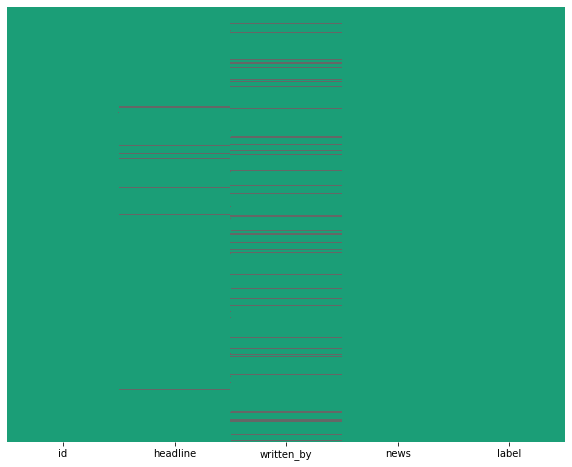

In [ ]:
#Seeing the missing values via visualization
plt.figure(figsize=(10,8))
sns.heatmap(df_fake.isnull(),yticklabels=False,cbar=False,cmap="Dark2")
plt.show()

In [ ]:
#Observation:
#The maximum missing values present in written_by and headline,and only few in new columns.as the data is textbased we cannot fill missing value with mode,median,mean.

[]

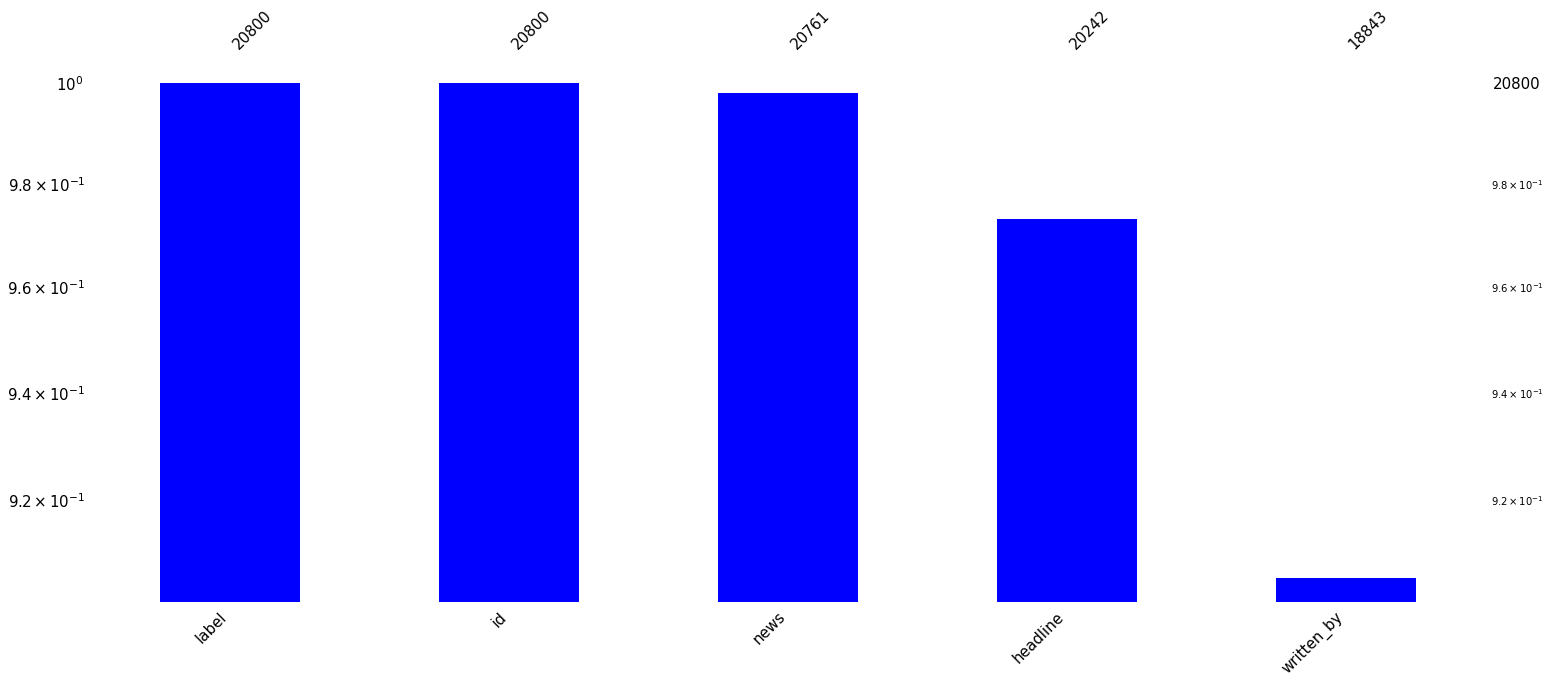

In [ ]:
#plotting the barplot of the null values
plt.figure(figsize=(10,8))
misso.bar(df_fake,fontsize=15,sort="descending",log=True,color="blue")
plt.plot()

In [ ]:
#Missing number barplot,plots the graph of non missing values as well as providing the actual number present in datasets.we get the knowledge of how much missing value is missing.
#I have to remove the null values present in the rows because it is a text data i cannot feel it ,so its better to drop them

In [ ]:
#Here we can see the percentage of nan values present in each features
feature_nan=[features for features in df_fake.columns if df_fake[features].isnull().sum()>1]
#percentage of missing values
for feature in feature_nan:
  print(feature,np.round(df_fake[feature].isnull().mean(),4), "%Missing values")


headline 0.0268 %Missing values
written_by 0.0941 %Missing values
news 0.0019 %Missing values


In [5]:
#Droping nan values
df_fake=df_fake.dropna()

[]

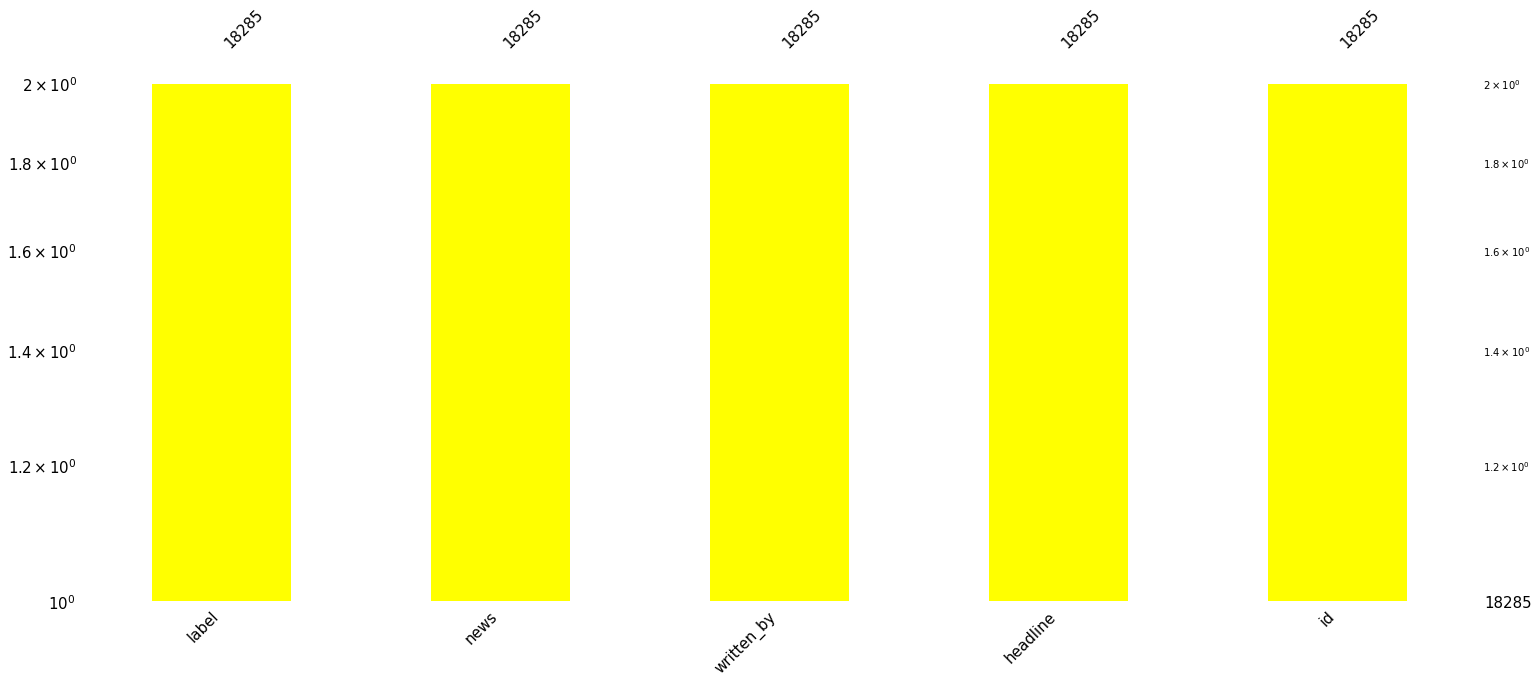

In [ ]:
#Plotting the barplot wheather null value present anymore
plt.figure(figsize=(10,8))
misso.bar(df_fake,fontsize=15,color="yellow",sort="descending",log=True)
plt.plot()

In [ ]:
#checking the shape of dataset after removing the null values
print("After removing the null value the shape of dataset is :",df_fake.shape)

After removing the null value the shape of dataset is : (18285, 5)


In [ ]:
print("There are {} unique headline in this dataset such as: \n\n{}...".format(len(df_fake.headline.unique()),
                                                                           "\n\n".join(df_fake.headline.unique()[0:5])))

There are 17931 unique headline in this dataset such as: 

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times

U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times

Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart

Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times

A Digital 9/11 If Trump Wins...


In [ ]:
#Checking the number of uniquue news
print("The unique number of news is:",(df_fake.news.nunique()))

The unique number of news is: 18017


In [ ]:
#Checking the number of written_by
print("The unique number of written_by is:",(df_fake.written_by.nunique()))

The unique number of written_by is: 3838


In [ ]:
#Observation:
#There are 17931 headlines and 18017 news article present in datasets.it shows that some duplicate article present in our datasets.

In [ ]:
#Checking the distribution of the tabels
print("Count of Real and Fake News:\n",df_fake.label.value_counts())


In [ ]:
#The Maximum null values present in label 1 so it is  fakenews

#####The Maximum null values present in label 1 so it is  fakenews

###1 stand for fake and 0 stand  for real news

In [ ]:
#Checking the ratio of labels
print("Real News Ratio:",round(len(df_fake[df_fake["label"]==0])/len(df_fake["label"]),3)*100,"%")
print("Fake News Ratio:",round(len(df_fake[df_fake["label"]==1])/len(df_fake["label"]),3)*100,"%")

Real News Ratio: 56.699999999999996 %
Fake News Ratio: 43.3 %


In [6]:
#Creating the copy of dataset to reference
news=df_fake.copy()
df_fake.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [7]:
#Resetting the index
df_fake.reset_index(inplace=True)
df_fake.head()

,index,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [8]:
#Creating the new column before cleaning the news columns
df_fake["news_length"]=df_fake["news"].str.len()
df_fake.head()

,index,id,headline,written_by,news,label,news_length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164


### Data Cleaning Steps
1]Remove stopwords
2]Remove HTML tags
3]Remove Special Charcters
4]Convert Everything to lowercase
5]Stemming

##Procedding to perform Natural Language Processing

In [9]:
#Importing NLP librarirs
import nltk
import string
from nltk.corpus import stopwords
import re 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#Replace email address with email
df_fake["news"]=df_fake["news"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                             "emailaddress")
#Replace url with webaddress
df_fake["news"]=df_fake["news"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2-3}(/\S*)?$',
                                            "webaddress")
#Replace 10 digit phone number(format include parenthesis,space,nospace,dashes)with phonenumber
df_fake["news"]=df_fake["news"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{4}$',
                                            "phonenumber")
#Replace number with numbers
df_fake["news"]=df_fake["news"].str.replace(r'\d+(\.\d+)?',
                                            "numbers")

In [ ]:
df_fake["news"][5]

'The State of New Jersey says you can’t eat the fish or shellfish from the Lower Passaic River and Newark Bay. That’s because they’re living in the Diamond Alkali Superfund Site, where toxic leftovers from the manufacture of chemicals like DDT and the infamous Agent Orange oozed into surrounding waterways to be taken up by the animals that inhabited them. It’s an evolutionary miracle some of these animals are even alive. No, seriously. A fish that adapted to survive in this water shows evolution at its finest, according to a study published Thursday in Science. The Atlantic killifish is a slippery sliver of silver about the size of a fat finger and as common as the minnow. Starting in the late numberss, researchers became aware that the fish was tolerant of the toxic waters at the Lower Passaic Superfund site and at least three other highly polluted areas along the Atlantic coastline. The new study found that over just a few decades, distinct populations of killifish independently deve

In [11]:
#Remove Puntuation
df_fake["news"]=df_fake["news"].str.replace(r'[^\w\d\s]',' ')
#Replace WhiteSpace between term with single space
df_fake["news"]=df_fake["news"].str.replace(r'\s+',' ')
#Remove leading and trailing whitespace
df_fake["news"]=df_fake["news"].str.replace(r'^\s+|\s+?$',' ')


In [ ]:
df_fake["news"][5]

'The State of New Jersey says you can t eat the fish or shellfish from the Lower Passaic River and Newark Bay That s because they re living in the Diamond Alkali Superfund Site where toxic leftovers from the manufacture of chemicals like DDT and the infamous Agent Orange oozed into surrounding waterways to be taken up by the animals that inhabited them It s an evolutionary miracle some of these animals are even alive No seriously A fish that adapted to survive in this water shows evolution at its finest according to a study published Thursday in Science The Atlantic killifish is a slippery sliver of silver about the size of a fat finger and as common as the minnow Starting in the late numberss researchers became aware that the fish was tolerant of the toxic waters at the Lower Passaic Superfund site and at least three other highly polluted areas along the Atlantic coastline The new study found that over just a few decades distinct populations of killifish independently developed simila

In [12]:
#Convert everything into lower case
df_fake["news"]=df_fake["news"].str.lower()


In [13]:
#Remove stopwords
stop_words=set(stopwords.words("english") +["u","O","ur","2","4","dont","im","doin","ure"])
df_fake["news"]=df_fake["news"].apply(lambda x:' '.join(
    term for term in x.split() if term not in stop_words))

In [14]:
#Stemming
from nltk.stem import SnowballStemmer
snowball=SnowballStemmer("english")
df_fake["news"]=df_fake["news"].apply(lambda x:' '.join(
    snowball.stem(t)for t in x.split()))

In [ ]:
df_fake['news'][5]

'state new jersey say eat fish shellfish lower passaic river newark bay live diamond alkali superfund site toxic leftov manufactur chemic like ddt infam agent orang ooz surround waterway taken anim inhabit evolutionari miracl anim even aliv serious fish adapt surviv water show evolut finest accord studi publish thursday scienc atlant killifish slipperi sliver silver size fat finger common minnow start late numberss research becam awar fish toler toxic water lower passaic superfund site least three high pollut area along atlant coastlin new studi found decad distinct popul killifish independ develop similar genet adapt make life possibl unlik environ find show evolut start one place repeat share chang well uniqu pattern chang differ popul provid us realli use field exampl anim respond rapid chang extrem environ said dian nacci biologist environment protect agenc work studi research led noah reid evolutionari geneticist univers connecticut compar whole genom number killifish area nearbi 

In [15]:
#Creating new column clean_length
df_fake["clean_length"]=df_fake.news.str.len()

In [ ]:
df_fake.head()

,index,id,headline,written_by,news,label,news_length,clean_length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington sonni perdu tell georgian grow wear...,0,7936,4705
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela plan tactic approach design ...,0,6112,3802
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday abc week discuss republican plan repeal...,0,425,245
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta beleagu republican governor main seem ...,0,6516,3821
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham written extens intern affair...,1,9164,5851


In [ ]:
#Total length removal
print("Original length:",df_fake.news_length.sum())
print("Clean Length:",df_fake.clean_length.sum())
print("Total Words Removed:",(df_fake.news_length.sum())-(df_fake.clean_length.sum()))

Original length: 87771325
Clean Length: 53296551
Total Words Removed: 34474774


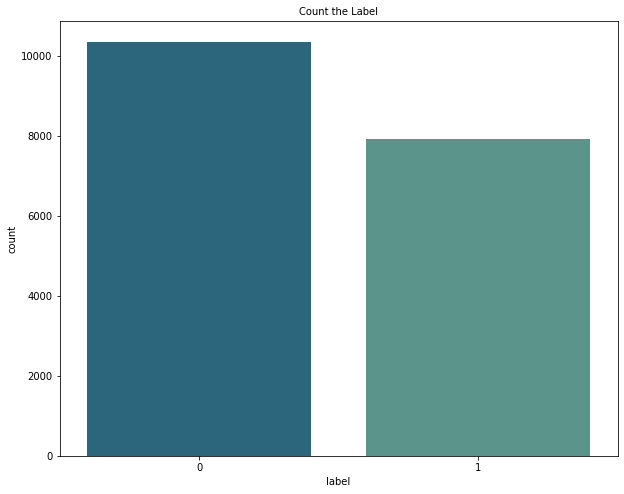

0    10361
1     7924
Name: label, dtype: int64


In [ ]:
#Plotting the count plot
plt.figure(figsize=(10,8))
sns.countplot(df_fake["label"],palette='crest_r')
plt.title('Count the Label',fontsize=10)
plt.xticks(rotation='horizontal')
plt.show()

print(df_fake["label"].value_counts())

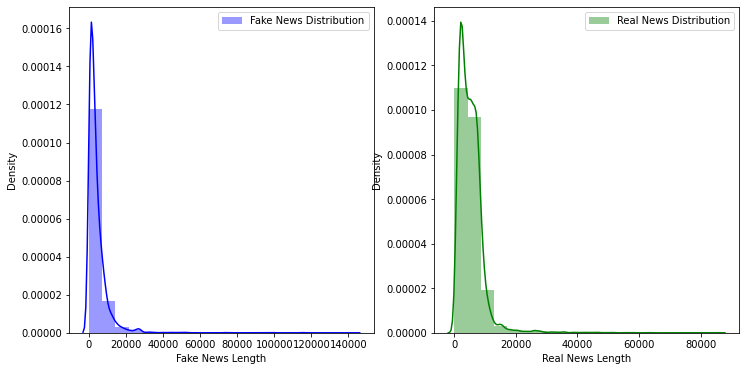

In [ ]:
#Ploting the distribution length before cleaning
f,ax=plt.subplots(1,2,figsize=(12,6))

sns.distplot(df_fake[df_fake['label']==1]['news_length'],bins=20, ax=ax[0],label='Fake News Distribution',color='b')
ax[0].set_xlabel('Fake News Length')
ax[0].legend()

sns.distplot(df_fake[df_fake['label']==0]['news_length'],bins=20,ax=ax[1],label='Real News Distribution',color='g')
ax[1].set_xlabel('Real News Length')
ax[1].legend()

plt.show()

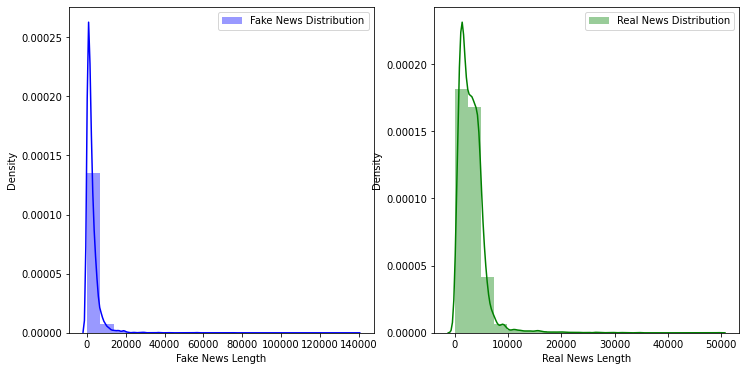

In [ ]:
#Ploting the distribution after cleaning news
f,ax=plt.subplots(1,2,figsize=(12,6))

sns.distplot(df_fake[df_fake['label']==1]['clean_length'],bins=20,ax=ax[0],label='Fake News Distribution',color='b')
ax[0].set_xlabel('Fake News Length')
ax[0].legend()

sns.distplot(df_fake[df_fake['label']==0]['clean_length'],bins=20,ax=ax[1],label='Real News Distribution',color='g')
ax[1].set_xlabel('Real News Length')
ax[1].legend()
plt.show()

In [ ]:
#Getting sense of loud words in fake news 
from wordcloud import WordCloud

spams=df_fake['news'] [df_fake['label']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='grey',max_words=60).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

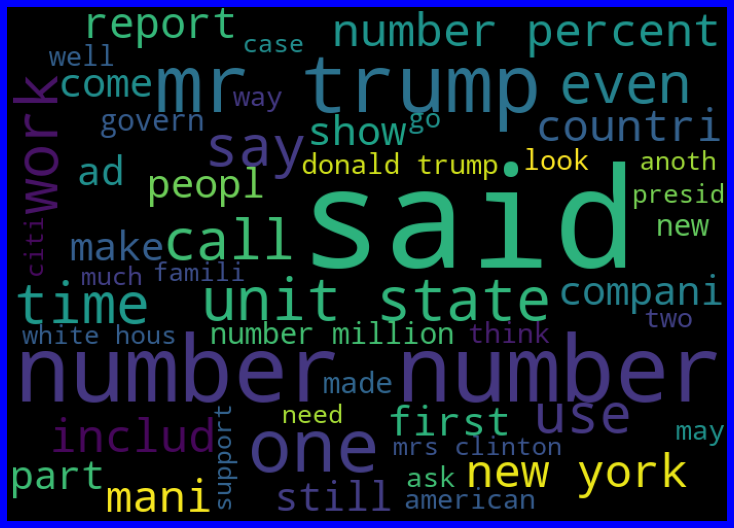

In [ ]:
#Getting sense of loud words in real new
from wordcloud import WordCloud
not_spam=df_fake['news'][df_fake['label']==0]
spam_cloud=WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(not_spam))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Convert the text into vector using Tf-idfVectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=1000,ngram_range=(1,1))
X=tf.fit_transform(df_fake['news'])

In [ ]:
X.shape

(18285, 1000)

In [17]:
y=df_fake['news']

In [18]:
#Split thed dataset into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(12250, 1000)
(6035, 1000)
(12250,)
(6035,)


In [ ]:
tf.get_feature_names()[:20]

['_____',
 'abl',
 'abus',
 'accept',
 'access',
 'accord',
 'account',
 'accus',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'actual',
 'ad',
 'addit',
 'address',
 'administr',
 'advanc',
 'advis']

In [ ]:
tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

#MultinomialNB

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
prednb=nb.predict(x_test)
print(confusion_matrix(y_test,prednb))
print(accuracy_score(y_test,prednb))
print(classification_report(y_test,prednb))



##Passive Aggressive Classifier Algorithm

In [ ]:

# Importing the Linrary
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier( validation_fraction=0.25,C=3, max_iter=1000, random_state=42, 
                                   n_iter_no_change=8,
                                   shuffle=True,
                                   loss='hinge',
                                   n_jobs=-1)

#Training the model
pac.fit(X_train,y_train)

#Makeing prediction
pred = pac.predict(X_test)

#Accuracy
score = accuracy_score(y_test,pred)
print("Accuracy: %0.3f" %score)

#Confusion Matrix
cm = confusion_matrix(y_test,pred)
print('\n',cm)

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Wistia_r')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Real','Fake'])
ax.yaxis.set_ticklabels(['Real','Fake'])
plt.show()

#Classification Report
print(classification_report(y_test, pred))

In [ ]:
## Get Features names for passive aggressive classifier
feature_names = tf_vec.get_feature_names()

In [ ]:
pac.coef_[0]

In [ ]:
###  Seeing the Most real words in our news column
sorted(zip(pac.coef_[0], feature_names), reverse=True)[:20]

In [ ]:
### Seeing the Most fake words in our news column
sorted(zip(pac.coef_[0], feature_names))[:20]

In [2]:
#2- Converting the Text using HashingVectorizer

In [ ]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer=HashingVectorizer(n_features=30000, binary=bool)

# Independent Features
X = hs_vectorizer.fit_transform(df['news']).toarray()

In [ ]:
#Checking the shape of the independent features
X.shape

In [ ]:
# Dependent Features
y = df['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [3]:
#Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pas_model=PassiveAggressiveClassifier(validation_fraction=0.25,C=3,max_iter=1000,random_state=42,
                                      n_iter_no_change=8,shuffle=True,loss='hinge',n_job=-1)
pas_model.fit(X_train,y_train)
pred=pas_model.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [4]:

#Conclusion: In Between Multinomial NB and Passive Aggressive Classifier Algorithm using TFIDF and Hashing Vectorizer , Passive Aggressive Classifier with TFIDF gives the best result so we save this model as our final model..¶

In [ ]:
#Saving the model
import joblib
joblib(pac,"fake news detection")